<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_in_1_week/blob/main/K_nearest_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Tshirt=pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [ ]:
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [ ]:
Tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [ ]:
X=Tshirt.drop('T Shirt Size',axis=1).values

In [ ]:
X.shape

(18, 2)

In [ ]:
y=Tshirt['T Shirt Size'].values

In [ ]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1])

In [ ]:
y_test

array([1, 0, 1, 0])

<Axes: >

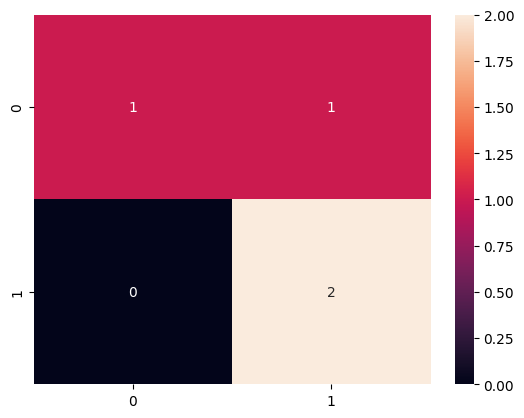

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

<ipython-input-28-f0aca964d754>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid==j,0],X_grid[y_grid==j,1],c=ListedColormap(('red','green'))(i),label=j)


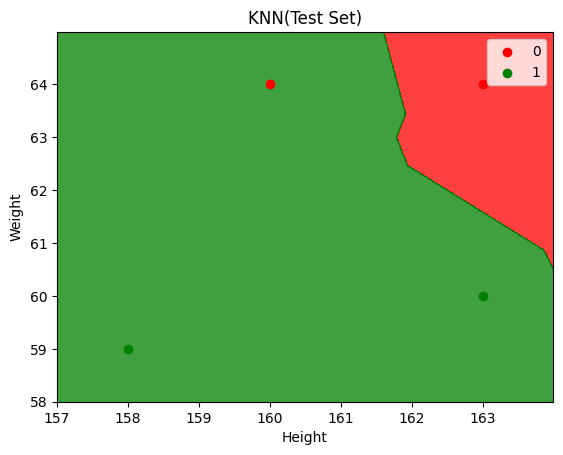

In [ ]:
from matplotlib.colors import ListedColormap
X_grid,y_grid=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_grid[:,0].min()-1,stop=X_grid[:,0].max()+1,step=0.01),np.arange(start=X_grid[:,1].min()-1,stop=X_grid[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid==j,0],X_grid[y_grid==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('KNN(Test Set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
#

In [ ]:
iris_df=pd.read_csv('Iris.csv')

In [ ]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=iris_df.drop('Species',axis=1)
y=iris_df['Species'].values

<Axes: >

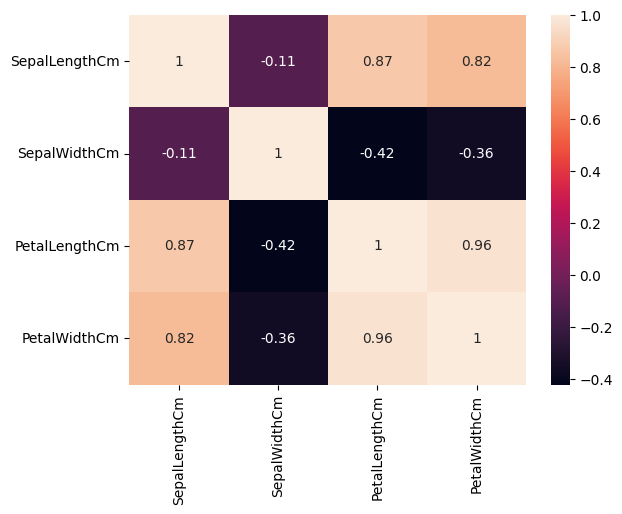

In [ ]:
sns.heatmap(x.corr(),annot=True)

In [ ]:
x=x.values
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



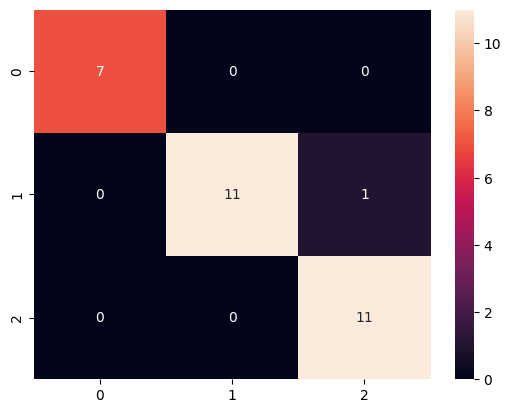

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))